In [1]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
x = df["Age"]
y = df["Income($)"]
X_train , X_test , Y_train , Y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
x_l = df.iloc[:, 1:-1].values
y_p = df.iloc[:, -1].values
y_p = y_p.reshape(-1,1)

In [5]:
stds_x = StandardScaler()
stds_y = StandardScaler()
x_l = stds_x.fit_transform(x_l)
y_p = stds_y.fit_transform(y_p)

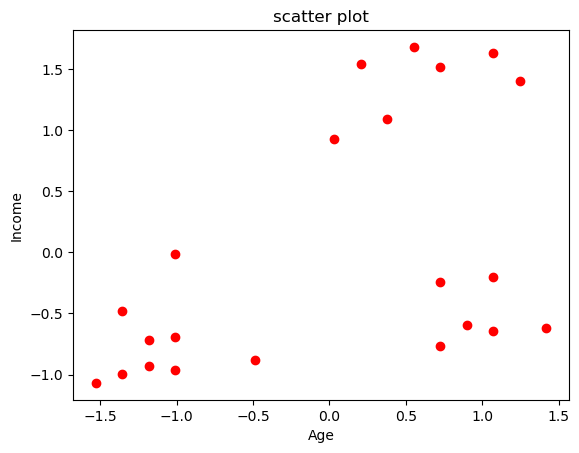

In [6]:
plt.scatter(x_l,y_p,color ='red')
plt.title ('scatter plot')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [7]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [8]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [9]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

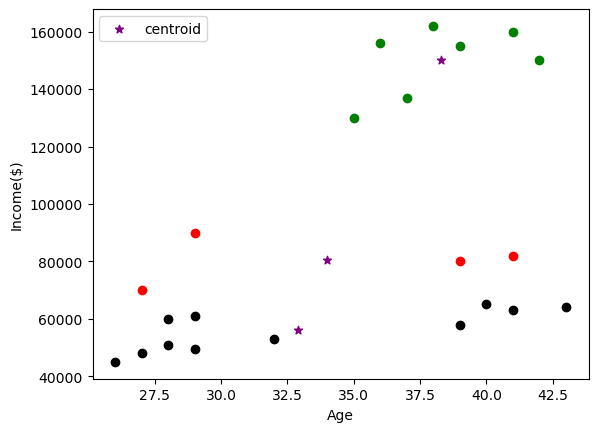

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color ='green')
plt.scatter(df2.Age,df2['Income($)'],color ='red')
plt.scatter(df3.Age,df3['Income($)'],color ='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


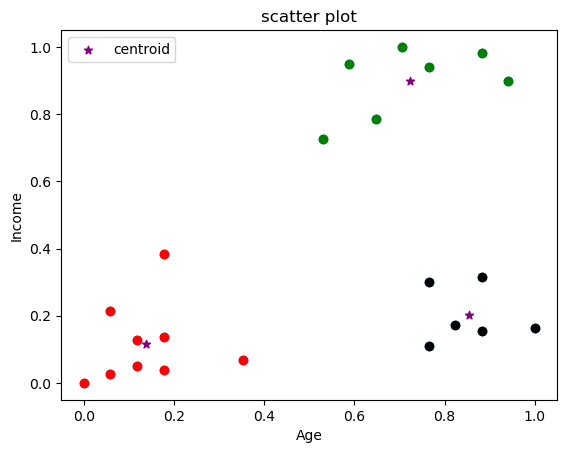

In [11]:
sc = MinMaxScaler()
df['Income($)'] = sc.fit_transform(df[['Income($)']])
df['Age'] = sc.fit_transform(df[["Age"]])
plt.scatter(df['Age'],df['Income($)'])
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_pred
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title ('scatter plot')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()